# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  40 баллов







-----

In [ ]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Импорты из sklearn:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from datetime import datetime
import typing as tp

from IPython.display import display
from pylab import rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Задача 1

In [ ]:
def plot_results(y_to_train, y_to_test, y_forecast, title):
    """
    Функция для визуализации временного ряда и предсказания.
    Параметры:
        - y_to_train: pd.Series размер T_train
            Временной ряд, на котором обучалась модель.
        - y_to_test: pd.Series размер T_test
            Временной ряд, который предсказывает модель.
        - y_forecast: array размер T_test
            Предсказания модели.
        - title: str
            Название графика
    """

    plt.figure(figsize=(15, 5))
    plt.title(title, fontsize=15)
    plt.plot(y_to_train, label="train")
    plt.plot(y_to_test, label="test")
    plt.plot(y_to_test.index, y_forecast, label="prediction")
    plt.legend()
    plt.show()

def calc_metrics(y_true, y_pred):
    """
    Функция для подсчета метрик качества прогноза
    Параметры:
        - y_true: np.array, pd.Series,  размер T_test
            Вектор истинных значений таргета
        - y_pred: np.array, pd.Series, размер T_test
            Векотр предсказанных знаяений таргета
    """

    print('MSE: ', mean_squared_error(y_true, y_pred))
    print('MAE: ', mean_absolute_error(y_true, y_pred))
    print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred))


def create_date_features(date):
    """Создает фичи из даты"""

    row = {}
    row['dayofweek'] = date.dayofweek
    row['quarter'] = date.quarter
    row['month'] = date.month
    row['year'] = date.year
    row['dayofyear'] = date.dayofyear
    row['dayofmonth'] = date.day
    row['weekofyear'] = date.weekofyear
    return row


def create_only_date_train_features(y_series):
    """
        Создает обучающий датасет из признаков, полученных из дат для y_series
    """

    time_features = pd.DataFrame([create_date_features(date) for date in y_series.index])
    return time_features, y_series


def create_shifted_features(
    y_series, shifts=5, week_seasonal_shifts=1, year_seasonal_shifts=1
):
    """
    Создает обучающий датасет из признаков, полученных из дат и значений ряда ранее.
    При этом используются значения ряда со сдвигами на неделю и год назад.
    Параметры:
        - y_series: pd.Series, размер T
            временной ряд.
        - shifts: int
            дневной сдвиг (сколько дней учитываем).
        - week_seasonal_shifts: int
            недельный сдвиг (сколько недель учитываем).
        - year_seasonal_shifts: int
            годовой сдвиг (сколько лет учитываем).
    """

    curr_df, y = create_only_date_train_features(y_series)
    curr_df.index = y_series.index

    # применяем сдвиг по дням
    for shift in range(1, shifts + 1):
        curr_df[f'shift_{shift}'] = y_series.shift(shift, axis=0)

    # применяем сдвиг по неделям
    for shift in range(1, week_seasonal_shifts + 1):
        curr_df[f"week_seasonal_shift_{shift}"] = y_series.shift(
            shift * 7, axis=0
        )

    # применяем сдвиг по годам
    for shift in range(1, year_seasonal_shifts + 1):
        curr_df[f"year_seasonal_shift_{shift}"] = y_series.shift(
            shift * 365, axis=0
        )

    y = y_series

    # удалим первые строчки с nan
    drop_indices = curr_df.index[curr_df.isna().sum(axis=1) > 0]
    curr_df = curr_df.drop(index=drop_indices)
    y = y.drop(index=drop_indices)
    return curr_df, y




def recursive_prediction(model, test_dates, y_to_train, features_creation_function):
    """
    Функция для рекурсивного предсказания для дат, указанных в test_dates.

    Параметры:
        - model
            Обученная МЛ-модель.
        - test_dates
            массив с датами, в которые надо сделать предсказания.
        - y_to_train
            Предыдущие значения
        - features_creation_function
            функция для создания тестовых признаков
    """

    predictions = []
    previous_y = list(y_to_train)

    for date in test_dates:

        # получаем признаки для тестовых данных из тестовой даты и предыдущих значений
        row = features_creation_function(date, previous_y)
        curr_test = pd.DataFrame([row])

        # выоплняем предсказание моделью
        curr_prediction = model.predict(curr_test)[0]
        # добавляем текущее предсказание к предыдущем значениям в список previous_y
        previous_y.append(curr_prediction)

        # сохраняем текущее предсказание для вердикта на тесте в список predictions
        predictions.append(curr_prediction)

    return np.array(predictions)

#### **Профиль физика**

В этом задании мы будем работать с данными о загрязнении воздуха в Пекине, которые можно скачать [здесь](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data). В этой папке представлены несколько таблиц, данные в них сняты с различных станций. Для дальнейшей работы выберите любую таблицу.

 В данных представлены следующие колонки:

* `year, month, day, hour`  &mdash; год, месяц, день и час измерения

* `PM2.5` концентрация PM2.5 (ug/m^3). `PM2.5` &mdash; описывает мелкие вдыхаемые частицы, диаметр которых обычно составляет 2,5 микрометра и меньше.
* `PM10` концентрация PM10 (ug/m^3). `PM10` &mdash; любые твердые частицы в воздухе диаметром 10 микрометров или меньше, включая дым, пыль, сажу, соли, кислоты и металлы.
* `SO2`: концентрация SO2 (ug/m^3),
* `NO2`: концентрация NO2 (ug/m^3),
* `CO`: концентрация CO (ug/m^3),
* `O3`: концентрация O3 (ug/m^3),
* `TEMP`: температура (degree Celsius),
* `PRES`: давление (hPa=100Pa),
* `DEWP`: температура точки росы (degree Celsius),
* `RAIN`: атмосферные осадки (mm),
* `wd`: направление ветра,
* `WSPM`: скорость ветра (m/s),
* `station`: название станции.

Таргетом в этой задаче будет показатель загрязнения воздуха `PM10`.

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['PRSA_Data_Gucheng_20130301-20170228.csv']))
data.head()

Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228 (1).csv


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Колонка с исходными датами здесь отсутствует. Создадим ее сами и поставим вместо индекса.

In [ ]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data = data.set_index('date')
data

Удалим ненужные колонки.

In [ ]:
data = data.drop(['No', 'station', 'wd'], axis=1)

In [ ]:
data


Проверьте, есть ли в данным пропуски. Если да - удалите эти строки.

In [ ]:
data.info()

In [ ]:
data = data.dropna()

In [ ]:
data.info()

Визуализируйте временные ряды для колонок, описывающих химические и физические свойства (т. е. для всех колонок, кроме временных признаков)

In [ ]:
train = data[0:26280:1]
test = data[26280::]

In [ ]:
train
test

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,,,,
2016-05-30,2016,5,30,23,100.0,128.0,15.0,53.0,1100.0,137.0,25.8,994.0,17.4,0.0,0.8
2016-05-31,2016,5,31,0,92.0,129.0,13.0,49.0,1000.0,120.0,23.8,994.2,17.3,0.0,0.6
2016-05-31,2016,5,31,1,85.0,99.0,12.0,50.0,900.0,103.0,23.8,994.4,16.3,0.0,0.5
2016-05-31,2016,5,31,2,76.0,161.0,12.0,55.0,1100.0,92.0,23.1,994.7,16.2,0.0,0.8
2016-05-31,2016,5,31,3,118.0,258.0,9.0,88.0,1300.0,49.0,22.2,995.3,16.5,0.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,3.1
2017-02-28,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,1.9
2017-02-28,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,2.3


In [ ]:
X_train, y_train = create_only_date_train_features(train)
X_test, y_test = create_only_date_train_features(test)


In [ ]:
LinReg = LinearRegression().fit(X_train,y_train)
DecTree = DecisionTreeRegressor().fit(X_train,y_train)
RandForest = RandomForestRegressor().fit(X_train,y_train)

In [ ]:
features = ['PM2.5'	,'PM10'	,'SO2'	,'NO2',	'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN','WSPM']

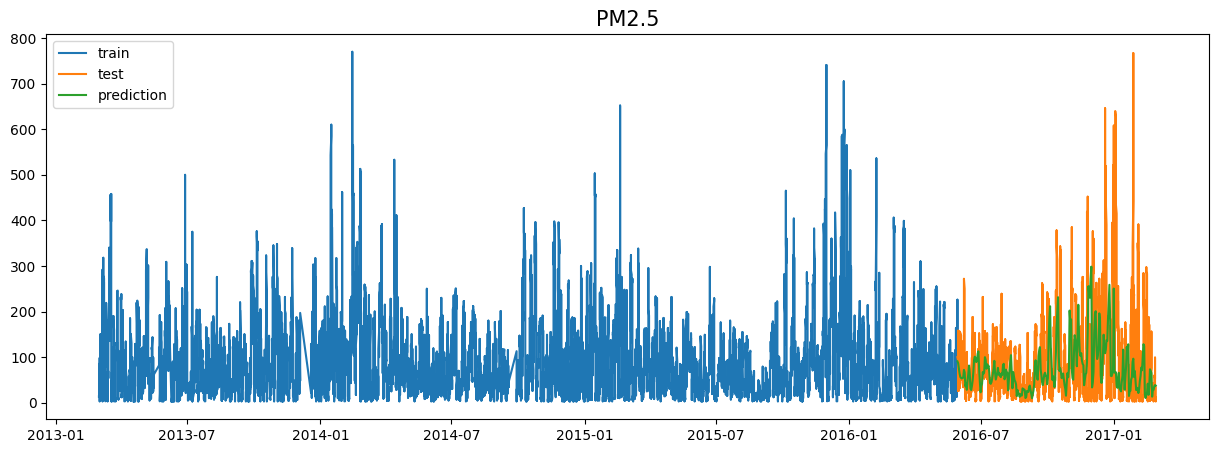

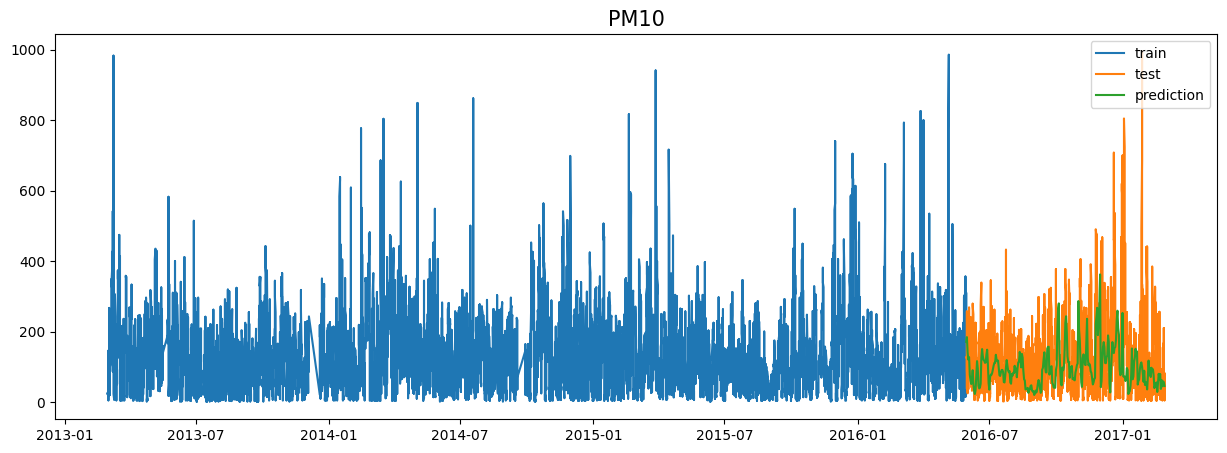

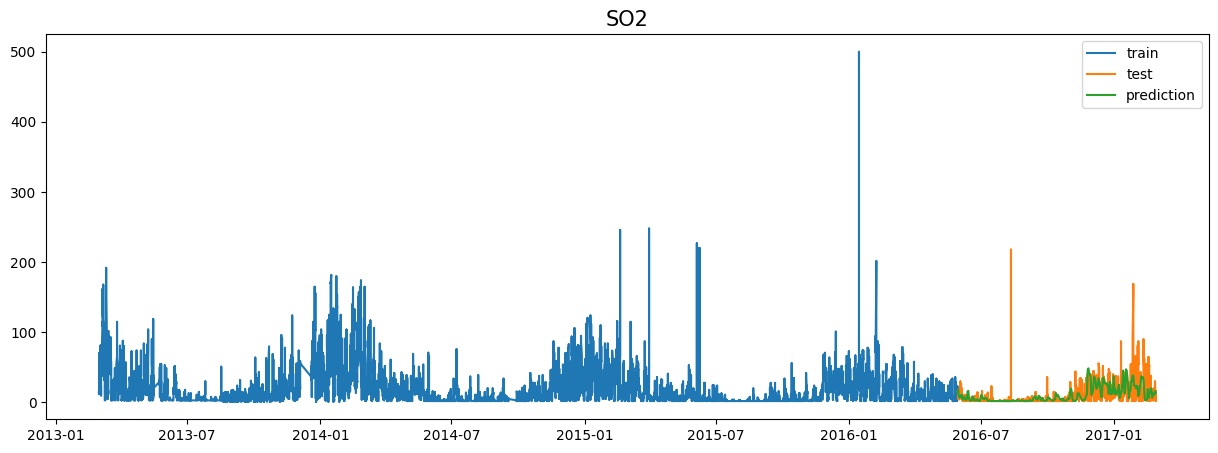

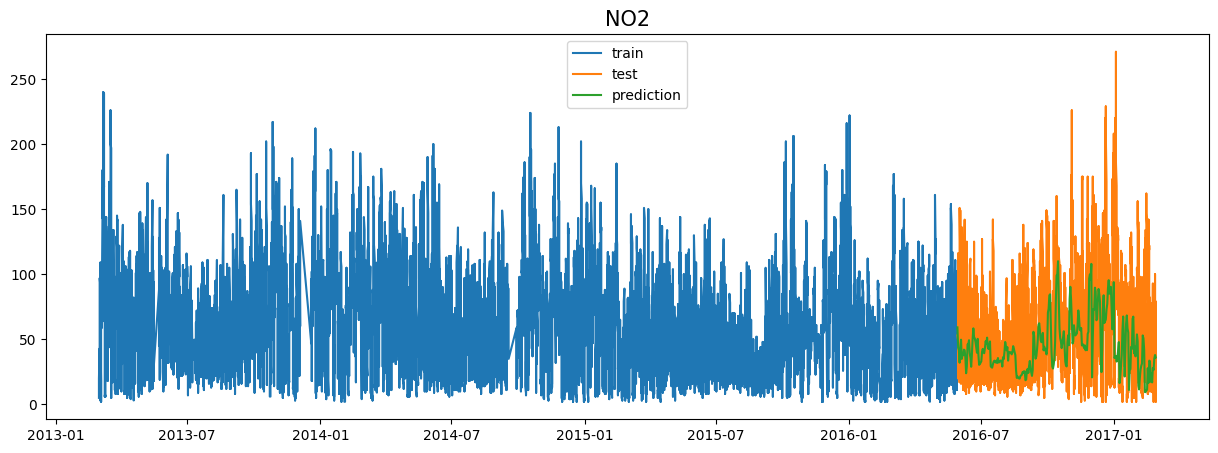

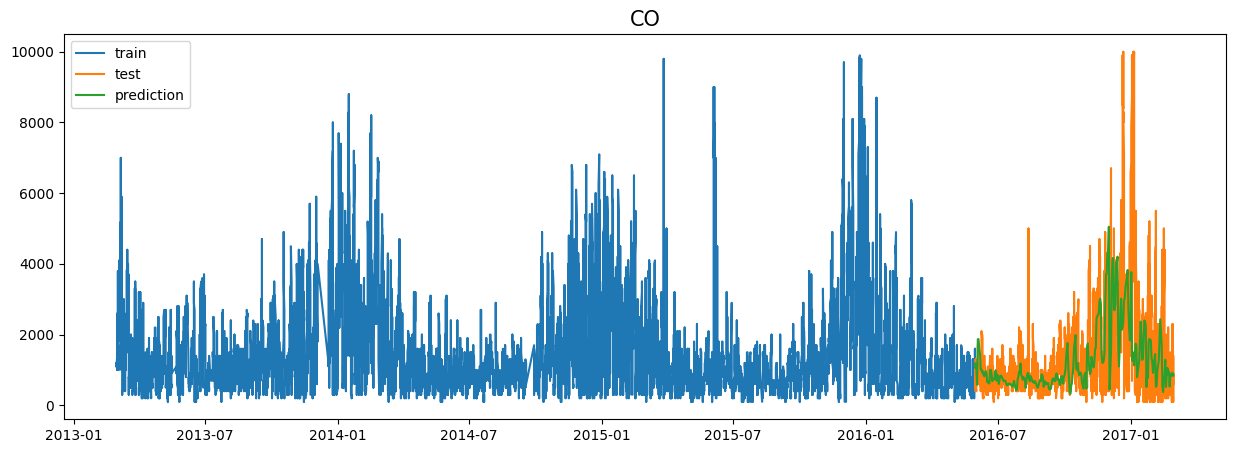

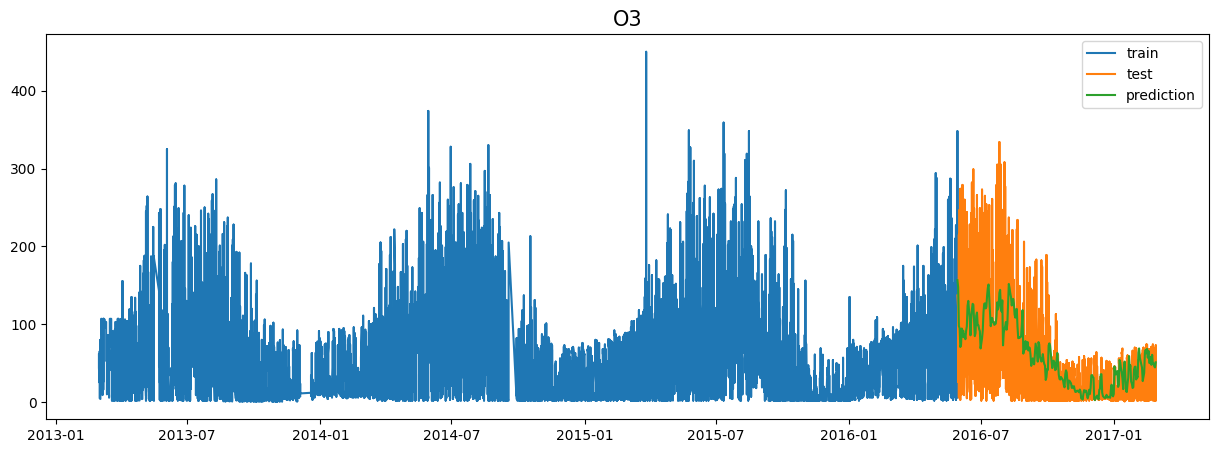

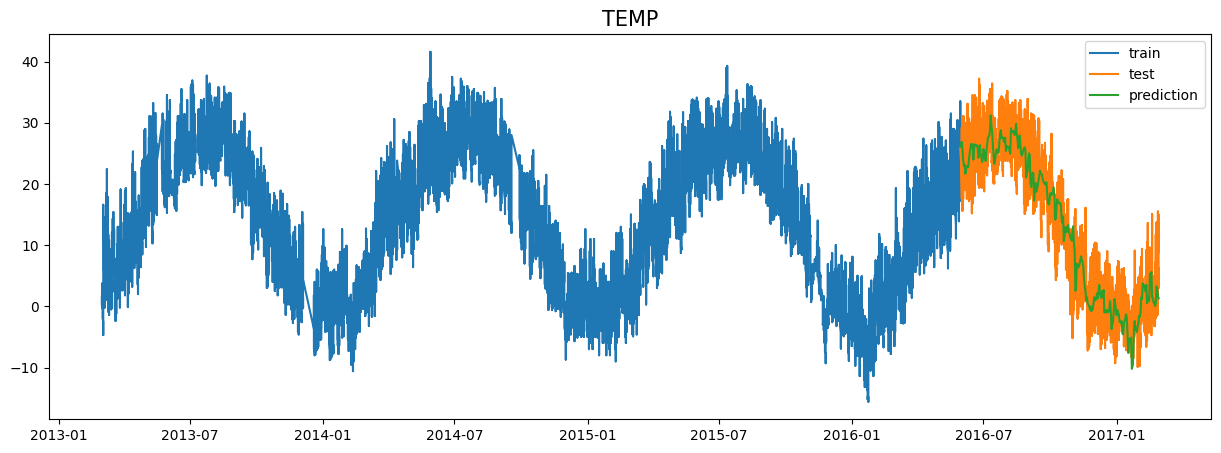

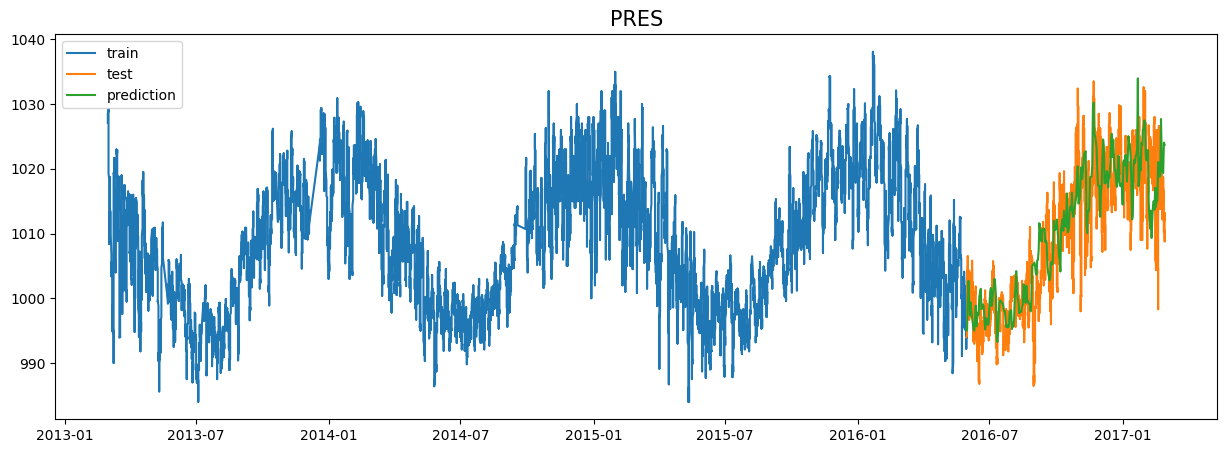

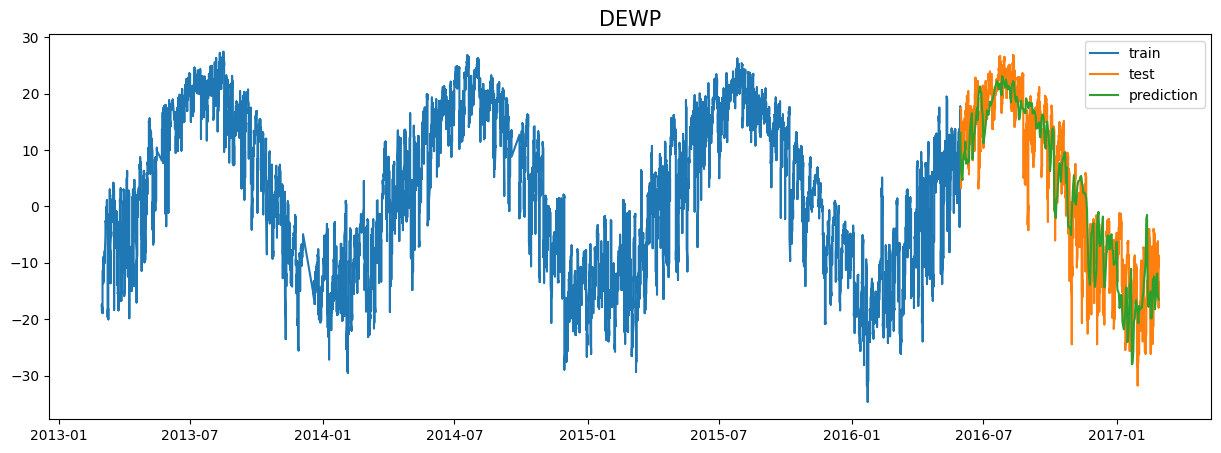

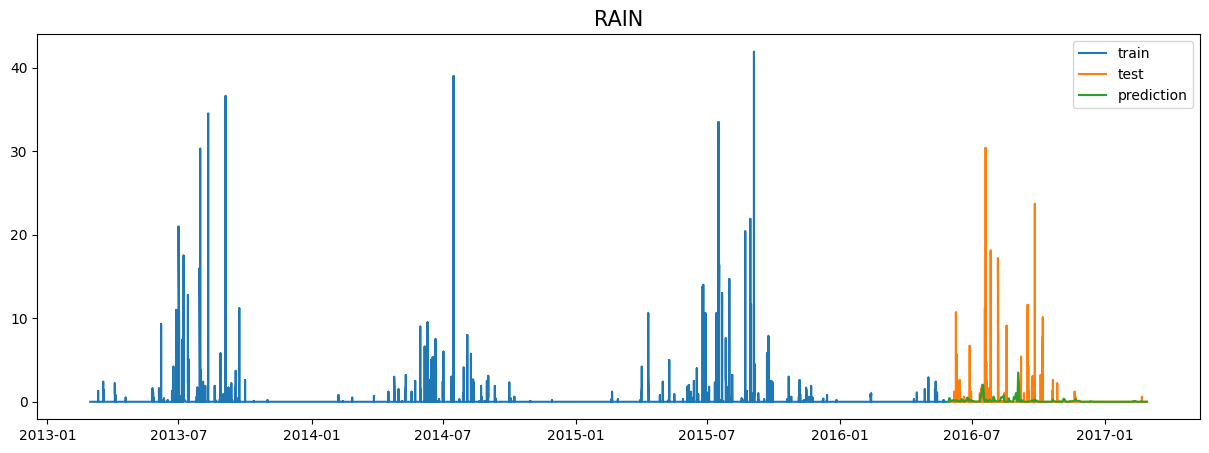

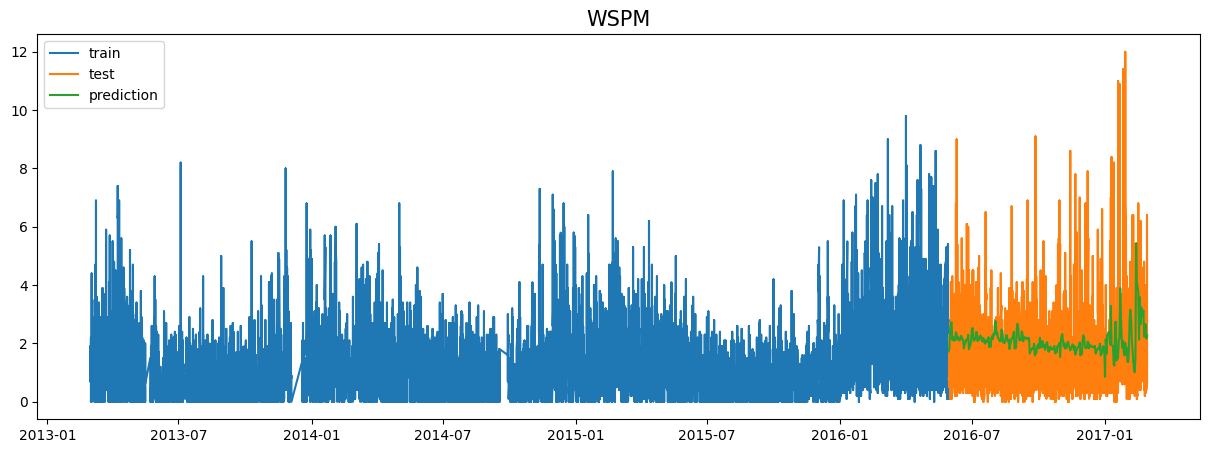

In [ ]:
for feature in features:
   to_train = train[feature]
   to_test  = test[feature]
   X_train, y_train = create_only_date_train_features(to_train)
   plot_results(y_train,to_test,recursive_prediction(
    RandomForestRegressor(n_estimators=300, random_state=42).fit(X_train,y_train),
    to_test.index,
    y_train,
    lambda date, previous_y: create_date_features(date),
), feature)

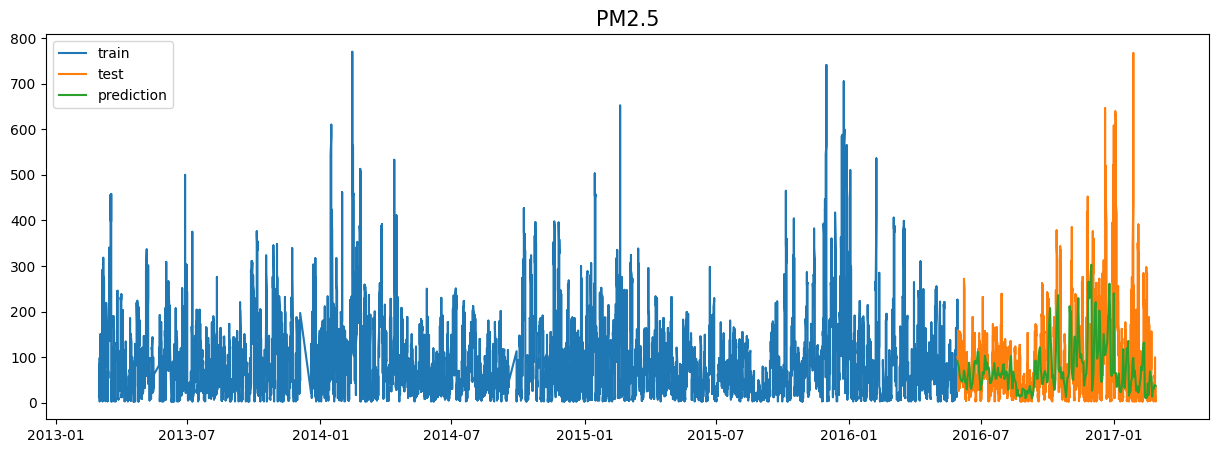

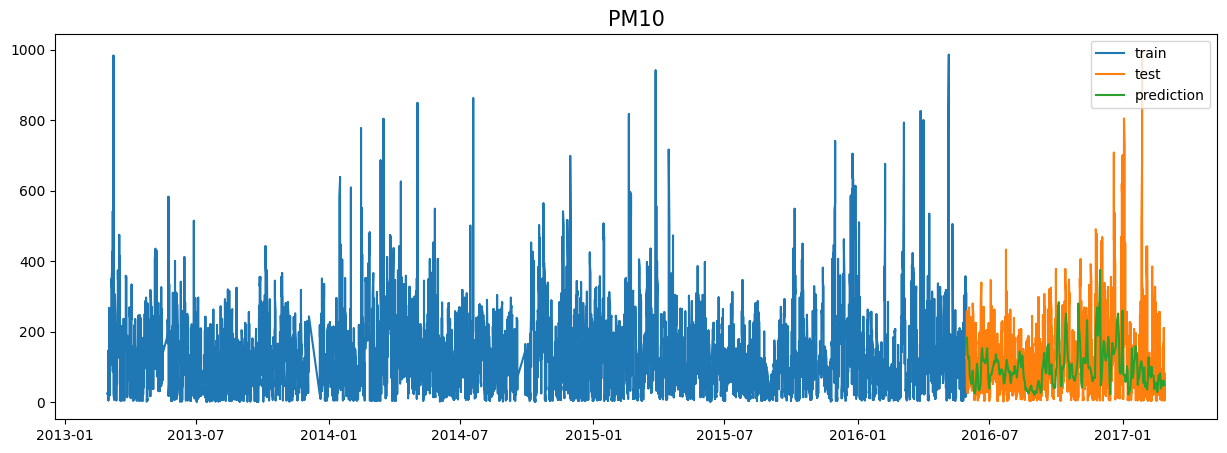

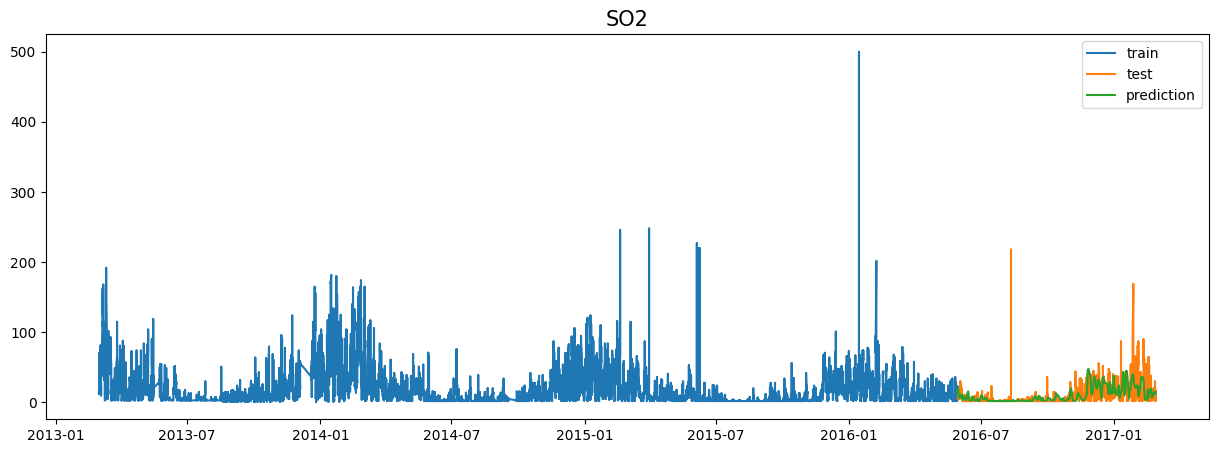

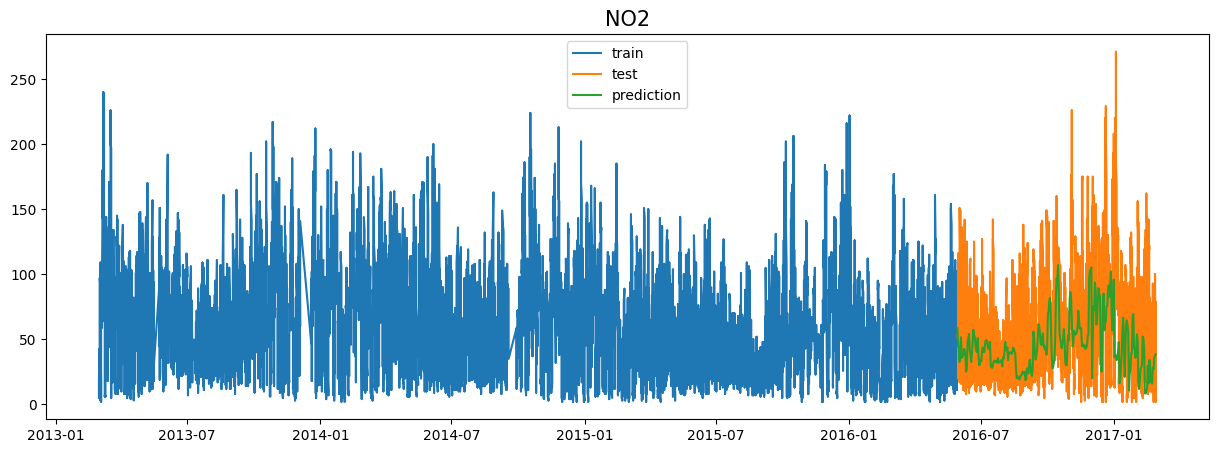

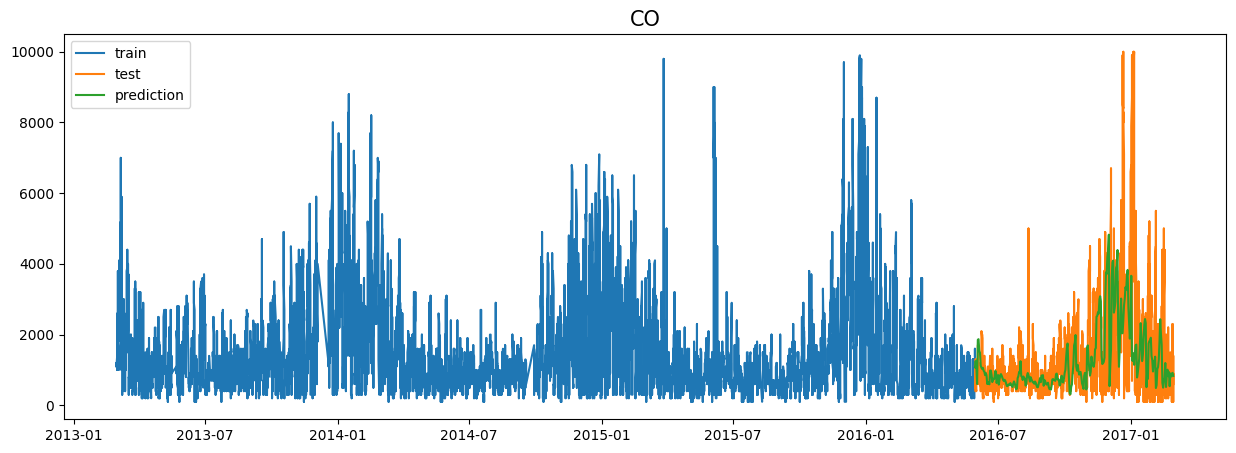

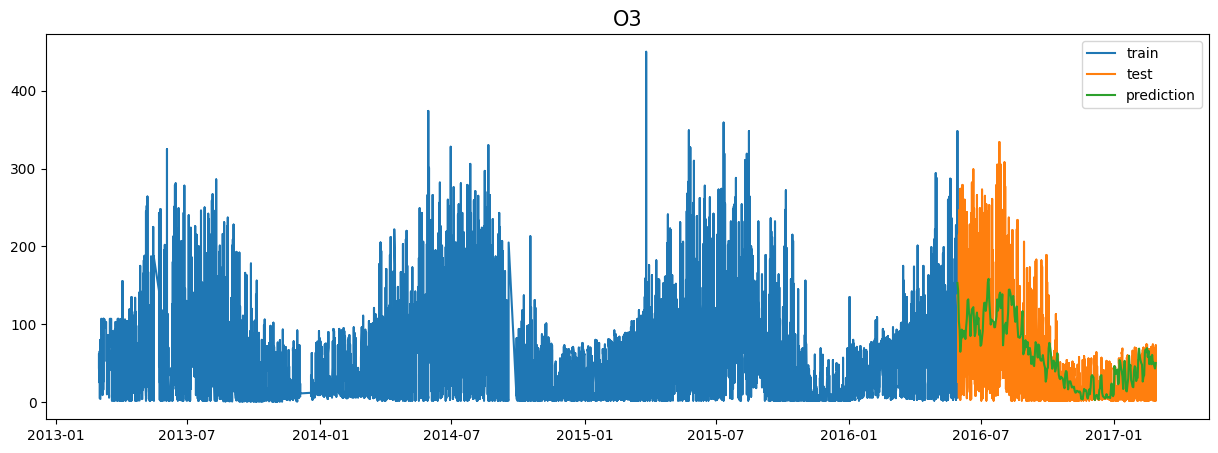

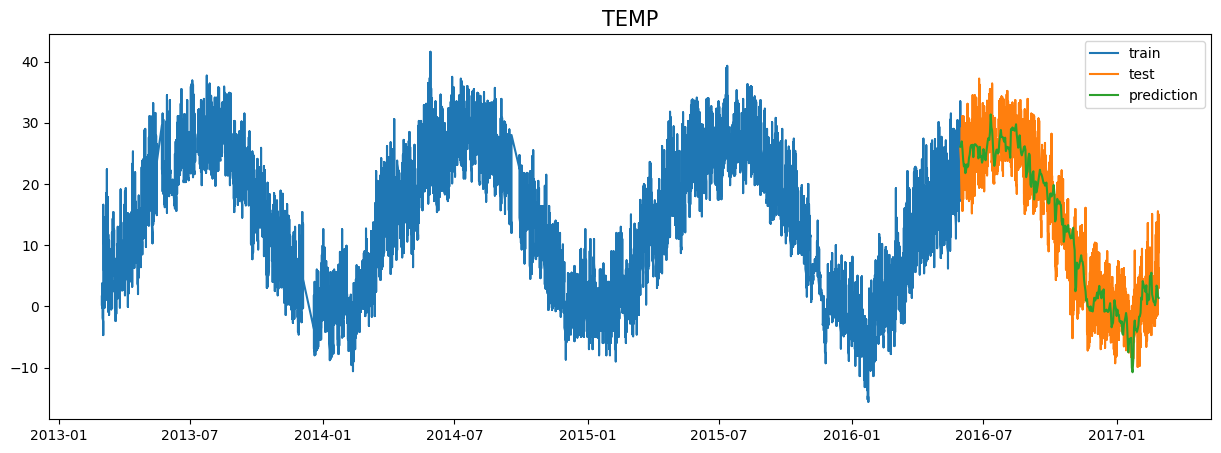

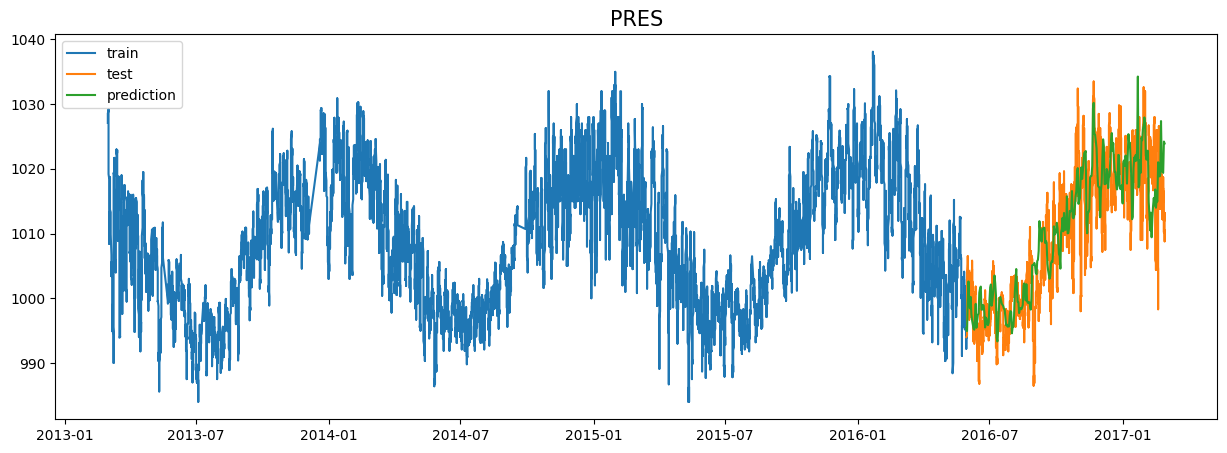

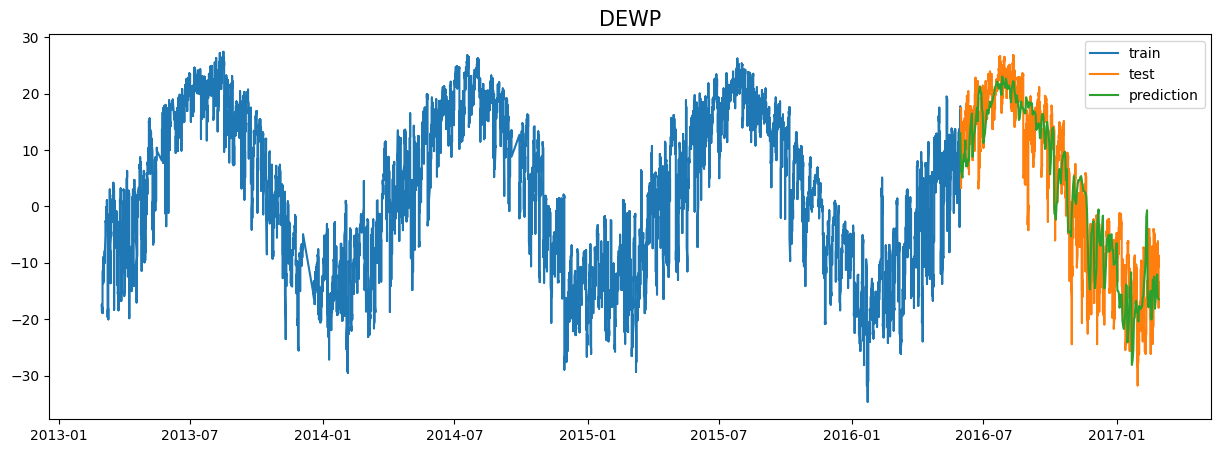

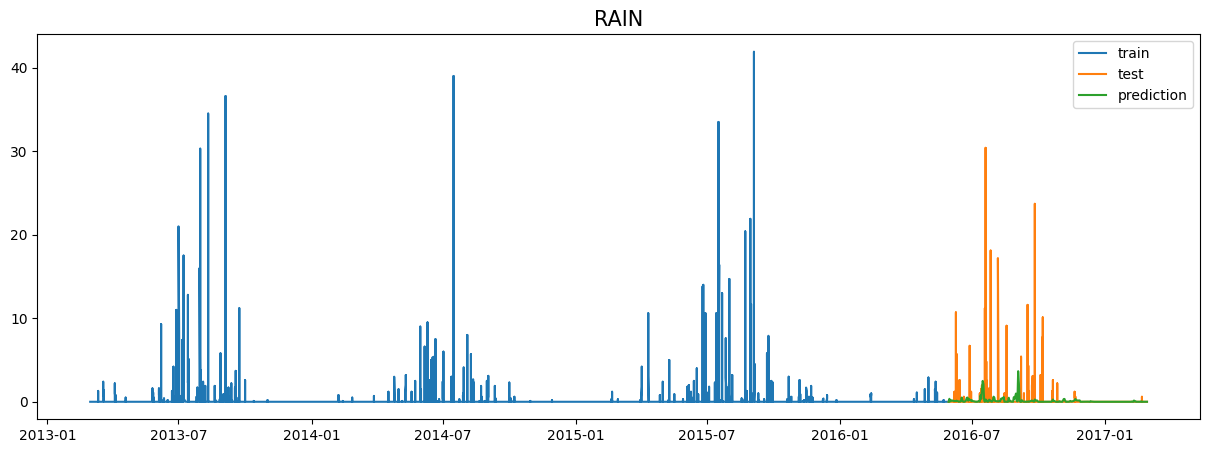

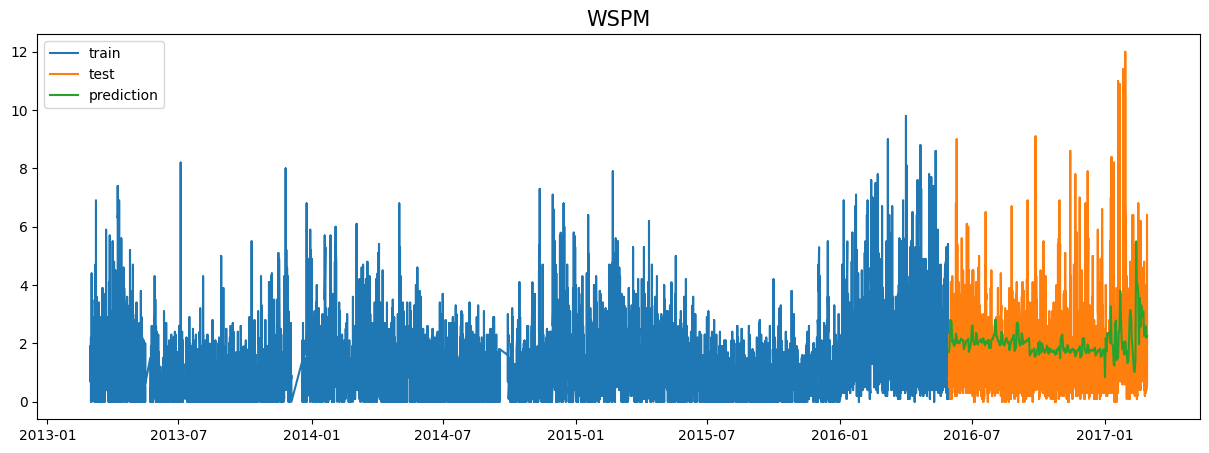

In [ ]:
for feature in features:
   to_train = train[feature]
   to_test  = test[feature]
   X_train, y_train = create_only_date_train_features(to_train)
   X_test , y_test = create_only_date_train_features(to_test)
   plot_results(y_train, y_test, RandomForestRegressor().fit(X_train,y_train).predict(X_test), feature)

Какие закономерности вы видите на графиках?

**Ответ:** Данные имеют полугодичный характер





Сгенерируйте новые временные признаки, основываясь на графиках выше. Допишите функцию для создания данных со сдвигом `create_shifted_features`. Помните, что у нас данные поступают каждый час, то есть сдвиг на 1 отвечает сдвигу на 1 час, сдвиг 24 отвечает сдвигу на 1 день, сдвиг на 7*24 отвечает сдвигу на месяц.

*Указание:* эту функцию нужно использовать для **таргета**!

In [ ]:
<...>

Отделите таргет от признаков. К физическим признакам добавьте временные, полученные в ячейке выше.

In [ ]:
<...>

Разбейте ваши данные таким образом, чтобы в тесте остался последние 20% измерений.

In [ ]:
<...>

Обучите линейную регрессию с регуляризацией и случайный лес на ваших данных. Допишите функцию `recursive_prediction`.  Посчитайте метрики с помощью функции `calc_metrics`.

In [ ]:
<...>

Визуализируйте полученные прогнозы с помощью функции `plot_results`.

In [ ]:
<...>

Сделайте выводы.

**Вывод:** <...>

#### **Профиль биология**

### Загрузка данных
В этом задании вы будете работать с данными о распространении COVID-19, их можно скачать [здесь](https://www.kaggle.com/datasets/gpreda/coronavirus-2019ncov). Мы будем предказывать показатель смертности, потому что способы измерения выздоровевших и заболевших разнятся между регионами.

 В данных представлены следующие столбцы:

* `Country/Region` &mdash; страна или регион,

* `Province/State` &mdash; город или населенный пункт,
* `Latitude` &mdash; географическая широта,
* `Longitude` &mdash; географическая долгота,
* `Confirmed` &mdash; кол-во подтвержденных случаев заболевания,
* `Recovered` &mdash; кол-во подтвержденных случаев выздоровления,
* `Deaths` &mdash; кол-во смертей,
* `Date` &mdash; дата.

Загрузим данные.

In [ ]:
data = <...>

Колонку `Date` преобразуем к правильному типу данных и поставим вместо индексов.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

Выберите любую страну из колонки `Country/Region` и любой крупный город из колонки `Province/State` (значения `Deaths` не должны опускаться ниже 2500). Обрежьте ваш датасет, чтобы в нем осталась информация только о выбранном городе.

In [ ]:
<...>

Оставьте в ваших данных только столбец `Deaths`.

In [ ]:
<...>

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

In [ ]:
<...>

**Ответ:**<...>

Сгенерируйте новые временные признаки, основываясь на графиках выше. Допишите функцию для создания данных со сдвигом `create_shifted_features`. Помните, что у нас данные поступают каждый день, то есть сдвиг на 1 отвечает сдвигу на 1 день, сдвиг 7 отвечает сдвигу на 1 неделю, сдвиг на 365 отвечает сдвигу на год.



In [ ]:
<...>

Разбейте ваши данные таким образом, чтобы в тесте остался последние 20% измерений.

In [ ]:
<...>

Обучите линейную регрессию с регуляризацией и случайный лес на ваших данных. Допишите функцию `recursive_prediction`. Посчитайте метрики с помощью функции `calc_metrics`.

In [ ]:
<...>

Визуализируйте полученные прогнозы с помощью функции `plot_results`.

In [ ]:
<...>

Сделайте выводы.

**Вывод:** <...>

## Задача 2

Вспомним, что при построении деревьев в задаче регрессии для каждого листа вычисляется среднее по всем обучающим объектам, которые попали в данный лист. Тем самым значение в листе лежит в пределах области значений таргета на обучении (не превосходит максимального, не меньше минимального). В связи с этим деревья не могут предсказывать значения за пределами этой области. Зависимости в задачах временных рядов не редко имеют некоторый тренд, например, значения на тестовой части временного ряда могут оказаться вне области значений обучающей части ряда. Это означает, что решающее дерево не сможет построить хороший прогноз временного ряда. Проблема также распространяется на случайный лес.

В данной задаче вы реализуете другой способ прогнозирования временных рядов, который может решить эту проблему.

Исследуйте `Ridge`, `Lasso` и `ElasticNet` с различными параметрами на данных из предыдущей задачи. Подберите лучшую линейную модель.

In [ ]:
<...>

y_pred = <...>

Посчитайте остатки прогноза вашей модели на тренировочной выборке. Остатком является разность истинного значния и спрогнозированного.

In [ ]:
<...>

Теперь сделаем необычный ход &mdash; научим случайный лес предсказывать ошибку линейной модели. Для этого за `Х` возьмем исходные признаки, а за `y` - вектор разностей, который вы посчитали в ячейке выше.

Предскажем ошибку линейной модели на тестовой выборке. Получим вектор предсказанных ошибок.

In [ ]:
errors_pred = <...>

Теперь сложим прогноз линейной модели для тестовой выборки и прогноз ошибок случайного леса для этой же тестовой выборки. Посчитайте метрики для полученного вектора.

In [ ]:
calc_metrics(y_test, y_pred+errors_pred)

Визуализируйте новый прогноз.

In [ ]:
<...>

Сделайте вывод.

**Вывод:**<...>

Процедура, которую вы сейчас провели, называется **бустинг**. В этой модели последовательно объединяются деревья, которые учатся предсказывать ошибку предыдущего дерева. Благодаря такой схеме модели удается достичь высокого качества. Подробнее с бустингом мы ознакомимся в следующем семестре.